# Visualizing CS:GO Players by their "TrueSkill"
In the python notebook we created a simulation & obtained players TrueSkill rating.

In this R notebook we visualize some of these results.

In [2]:
require('ggplot2')
require("ggthemes")
require("scales")

In [3]:
# open data and 

setwd('C:/users/maximilian/documents')

dat = read.csv('leaderboard_.csv')

# let's see what that looks like
head(dat)

Rating,Variance,Player
31.53886,1.227740,Mathias 'MSL' Lauridsen
34.29799,1.230383,René 'cajunb' Borg
28.28279,1.231105,Kristian 'k0nfig' Wienecke
29.13149,1.234687,Andreas 'MODDII' Fridh
37.75346,1.235828,Emil 'Magisk' Reif
30.58233,1.236015,Pawe? 'byali' Bieli?ski


In [5]:
## Now lets do some visualization in ggplot2

grapher <- function(p1,p2,p3,p4,p5,start = 10,end = 50, theme= 'dark'){
  # takes in index numbers of 5 players: (p1, p2, ... , p5 etc...)
  plot_ <- ggplot(data = data.frame(x = c(start,end)), aes(x)) +
    stat_function(fun = dnorm, size = 1.5,  args = list(mean = dat[p1,1], sd = dat[p1,2]),aes(colour = as.character(dat[p1,3]))) + 
    stat_function(fun = dnorm, size = 1.5,  args = list(mean = dat[p2,1], sd = dat[p2,2]),aes(colour = as.character(dat[p2,3])))+
    stat_function(fun = dnorm, size = 1.5,  args = list(mean = dat[p3,1], sd = dat[p3,2]),aes(colour = as.character(dat[p3,3])))+
    stat_function(fun = dnorm, size = 1.5,  args = list(mean = dat[p4,1], sd = dat[p4,2]),aes(colour = as.character(dat[p4,3])))+
    stat_function(fun = dnorm, size = 1.5,  args = list(mean = dat[p5,1], sd = dat[p5,2]),aes(colour = as.character(dat[p5,3])))+ ylab("") +
    scale_y_continuous(name = "Probability") + #breaks = NULL)
    scale_x_continuous(name = "Rating") + ggtitle("CSGO Player Ratings")+ labs(colour = "Players")
  if (theme == 'light'){
    plot_ = plot_ + theme_hc() + scale_colour_hc()
  }
  else {
      if (theme == 'solarized'){
          plot_ = plot_ + theme_solarized() + scale_colour_solarized("blue")   
        }
      else{        
        if (theme == 'economist'){
          plot_ = plot_ + theme_economist() + scale_colour_economist()    
        }
        else{
          plot_ = plot_ + theme_hc(bgcolor = "darkunica") + scale_colour_hc("darkunica")
          }      
      }
  }
  return(plot_)
}


## Plots
Now let's plot 5 random players (randomly sample from the data).

We can do this in different plotting themes as well.

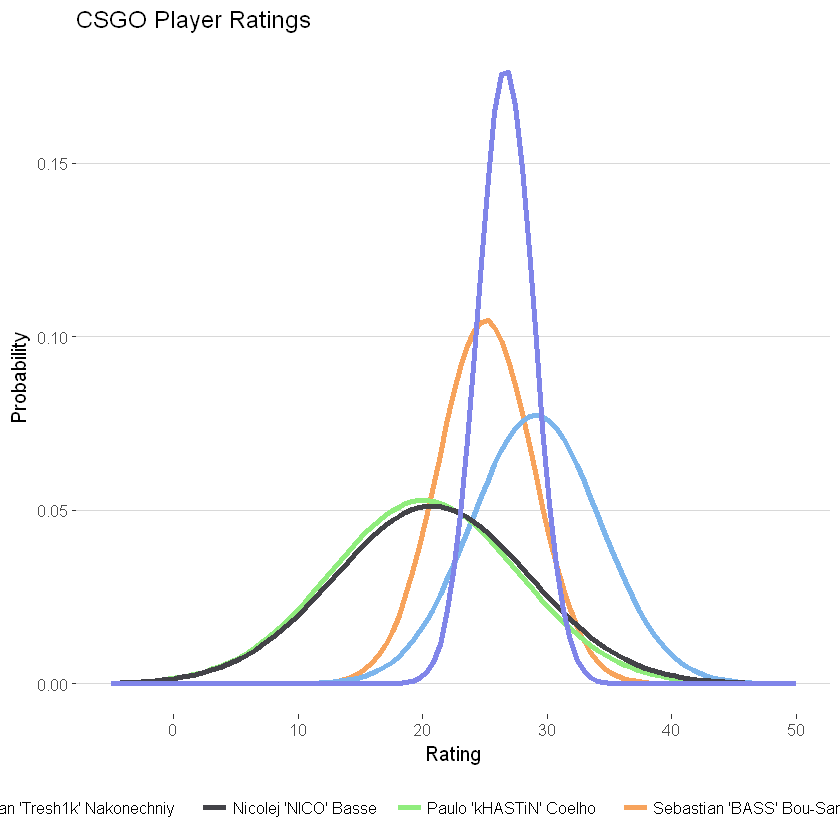

In [6]:
rands = sample(nrow(dat),5) #make randoms
# plotting
grapher(rands[1],rands[2],rands[3],rands[4],rands[5],
-5,50, theme = 'light')


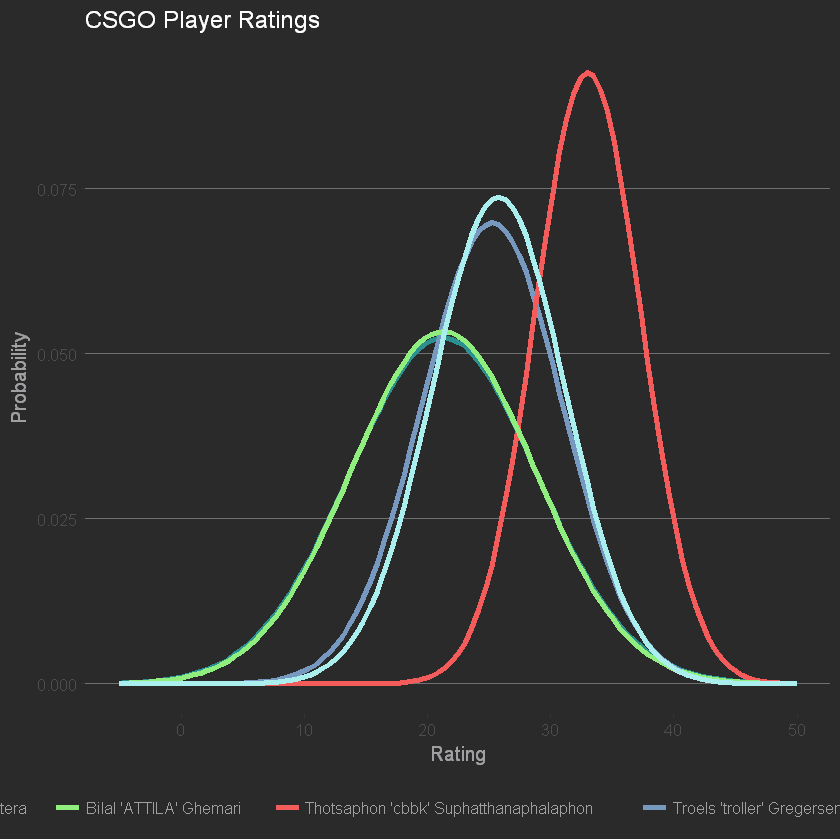

In [7]:
rands = sample(nrow(dat),5) # make randoms
# plotting
grapher(rands[1],rands[2],rands[3],rands[4],rands[5],
-5,50, theme = 'dark')

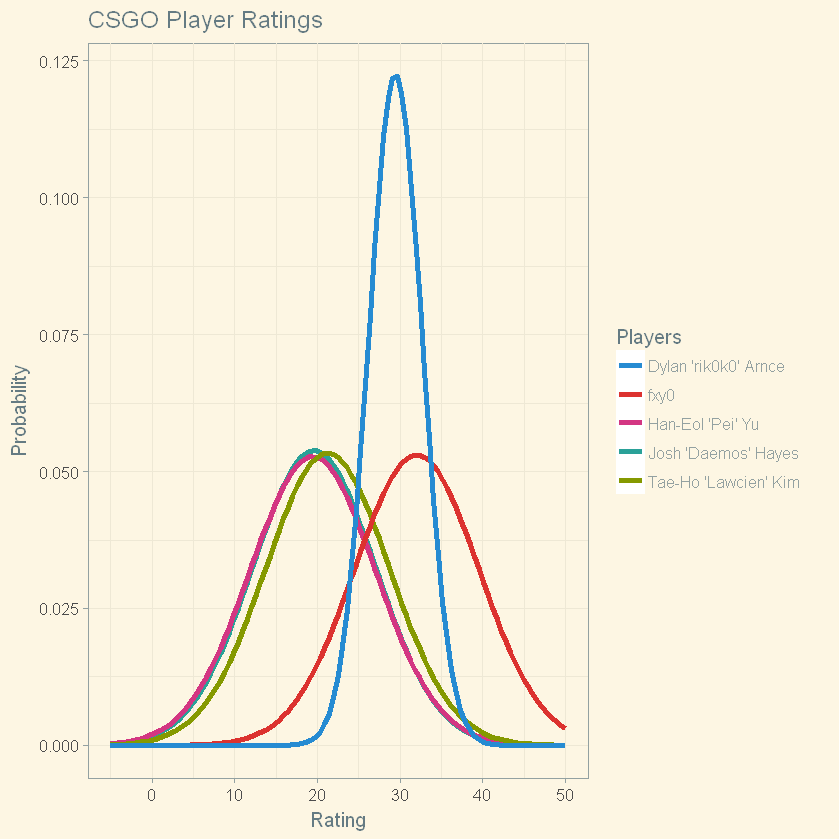

In [8]:
rands = sample(nrow(dat),5) # make randoms
# plotting
grapher(rands[1],rands[2],rands[3],rands[4],rands[5],
-5,50, theme = 'solarized')

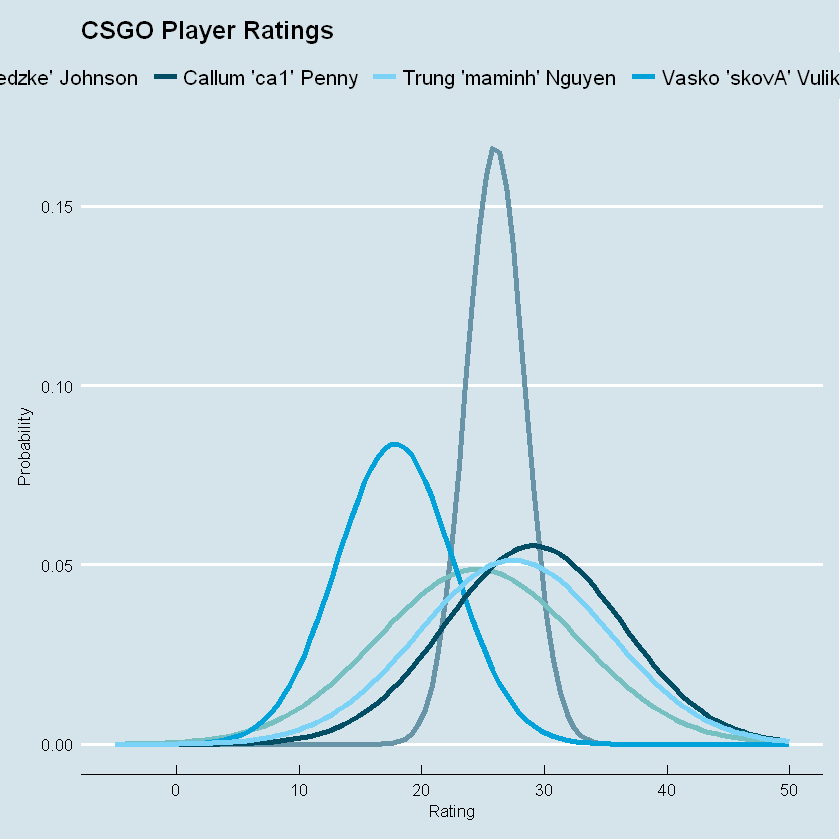

In [9]:
rands = sample(nrow(dat),5) # make randoms
# plotting
grapher(rands[1],rands[2],rands[3],rands[4],rands[5],
-5,50, theme = 'economist')